In [3]:
import os
import sys
import matplotlib.pyplot as plt
plt.rcParams['svg.fonttype'] = 'none'

# Set the working directory to the main folder
main_folder = '/home/sam/Desktop/beh_timescale'  # Adjust this path to your main folder
os.chdir(main_folder)
sys.path.insert(0, main_folder)
print(os.getcwd())  # This should print '/home/sam/Desktop/beh_timescale'


/home/sam/Desktop/beh_timescale


## PCA and KMeans Clustering Analysis of Experiment Data
Visualization of the behavioral data of various worms across multiple experiments using Principal Component Analysis (PCA) and KMeans clustering. This helps in identifying patterns and clusters within the data, which can provide insights into the underlying behavioral dynamics.

Filtered Experiments:
031424ppp1_30m_3mPeriod
040524ppp1_30m_3mPeriod
120922ppp1_30m_3mPeriod
Experiment to Color Mapping:
031424ppp1_30m_3mPeriod: (0.12156862745098039, 0.4666666666666667, 0.7058823529411765)
040524ppp1_30m_3mPeriod: (0.6823529411764706, 0.7803921568627451, 0.9098039215686274)
120922ppp1_30m_3mPeriod: (1.0, 0.4980392156862745, 0.054901960784313725)


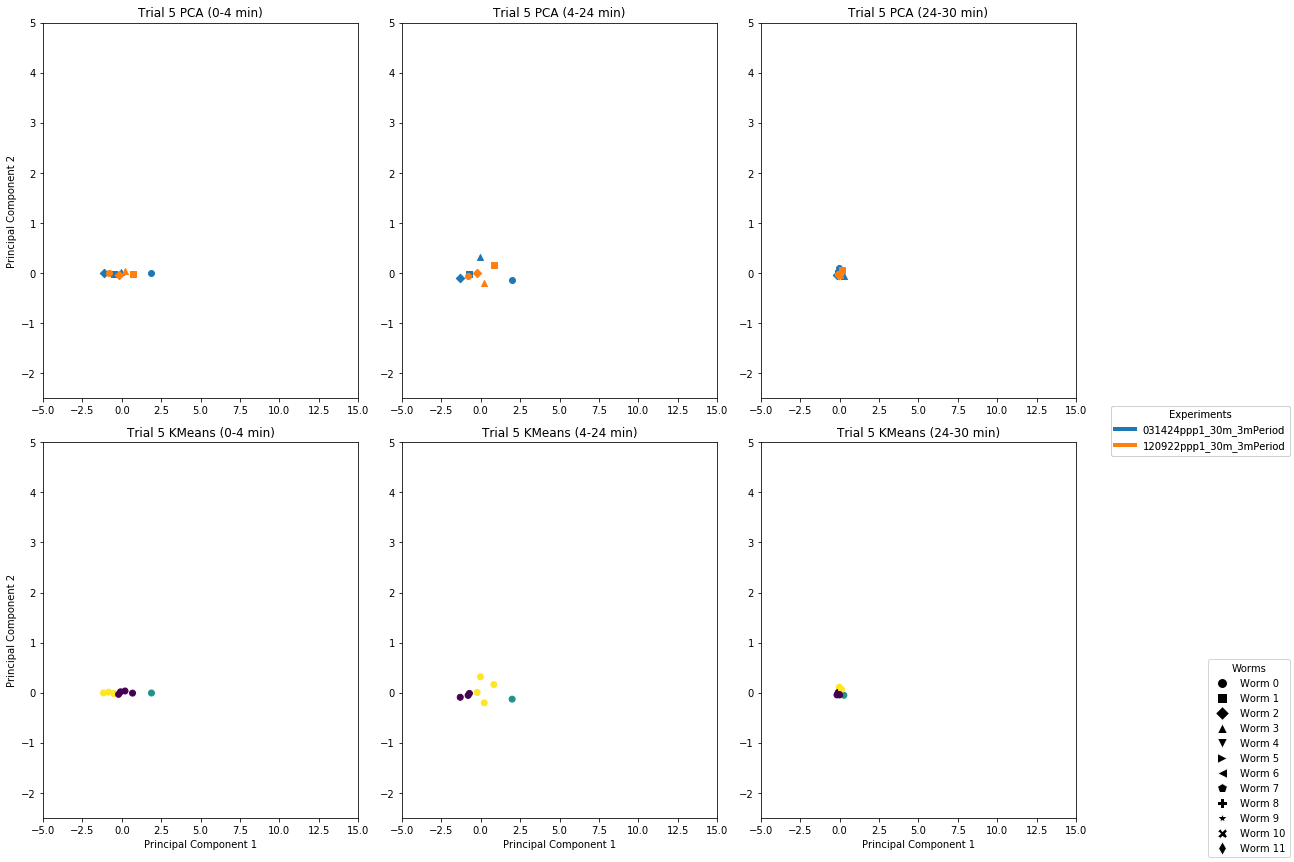

In [6]:
import pickle
from tools.preparing_data import *
from tools.filtering import *
from analysis_functions.PCA_behavior import flatten_trial_data, plot_pca_trials

# Load data
with open('data/LDS_response_sinFunc_indiv.pickle', 'rb') as f:
    test_result = pickle.load(f)

# Load and filter the data
test_result, filtered_experiments = load_and_filter_data(
    filepath='data/LDS_response_sinFunc_indiv.pickle',
    genotype='ppp1',
    duration='30m',
    period_suffix='3m',
    #exclude_dates=['051724WT_s1_30m_3mPeriod','081123WT_30m_3mPeriod','081823WT_30m_3mPeriod','051724WT_s3_30m_3mPeriod','051724WT_s2_30m_3mPeriod']
    #exclude_dates=['052623WT_30m_4mPeriod',]
    
)

# Prepare the aggregated data
tau = test_result['tau']
max_trials_limit = 10
aggregated_data, sliced_tau, adjusted_stim_data, max_trials = prepare_aggregated_data(test_result, filtered_experiments, tau, max_trials_limit)

# Prepare DataFrame
data_df = prepare_data_df(test_result, filtered_experiments, trials_range=range(1, 15))

# Exclude specific worms if needed
#exclude_worms = {'080123WT_30m_4mPeriod': [3], '052623WT_30m_4mPeriod':[0,6], }
exclude_worms = {'051624WT_30m_3mPeriod': [0,1,3],'052824WT_s2_30m_3mPeriod': [0]}

data_df = exclude_worms_from_df(data_df, exclude_worms)
data_df

# Flatten the trial data for PCA for a specific trial number (e.g., trial 5)
trial_number = 5
flattened_df = flatten_trial_data(data_df, trial_number)

# Perform PCA on the aggregated data
plot_pca_trials(flattened_df, trial_number, title_suffix=f'(Trial {trial_number}, colored by experiment)')

## Combined function to plot PCA results for individual worms and clusters for a given trial



In [ ]:
from analysis_functions.results_sin_indiv import load_and_filter_data, prepare_aggregated_data
from analysis_functions.PCA_behavior import *

# Load and filter the data
test_result, filtered_experiments = load_and_filter_data(
    filepath='data/LDS_response_sinFunc_indiv.pickle',
    genotype='WT',
    duration='30m',
    period_suffix='4m',
    #exclude_dates = ['080123WT_30m_4mPeriod','052623WT_30m_4mPeriod','053124WT_s1_30m_4mPeriod','053124WT_s2_30m_4mPeriod']
    #exclude_dates = ['081123WT_30m_3mPeriod','081823WT_30m_3mPeriod']
    exclude_dates = ['081123WT_30m_3mPeriod','081823WT_30m_3mPeriod']

)

# Prepare the aggregated data
tau = test_result['tau']
max_trials_limit = 10
aggregated_data, sliced_tau, adjusted_stim_data, max_trials = prepare_aggregated_data(test_result, filtered_experiments, tau, max_trials_limit)

# Define the intervals in minutes
intervals = [
    (0, 2),    # First 4 minutes after UV response
    (12, 24),   # From 4 min to 28 min
    (20, 28)   # From 20 min to 28 min
]


# Call the combined function to plot PCA for individual worms and clusters for trial 3
plot_pca_combined(aggregated_data, sliced_tau, intervals, num_clusters=3, n_components=4, trial_number=0)

## Combined function to plot PCA results for individual worms and clusters across its trials

- individual worm is kept color coordinated.

In [ ]:
import pickle
# Load data
with open('data/LDS_response_sinFunc_indiv.pickle', 'rb') as f:
    test_result = pickle.load(f)

# Load and filter the data
test_result, filtered_experiments = load_and_filter_data(
    filepath='data/LDS_response_sinFunc_indiv.pickle',
    genotype='WT',
    duration='30m',
    period_suffix='3m',
    exclude_dates=['081123WT_30m_3mPeriod','081823WT_30m_3mPeriod']
)

# Prepare the aggregated data
tau = test_result['tau']
max_trials_limit = 10
aggregated_data, sliced_tau, adjusted_stim_data, max_trials = prepare_aggregated_data(test_result, filtered_experiments, tau, max_trials_limit)



# Define the intervals in minutes
intervals = [
    (0, 4),    # First 4 minutes after UV response
    (4, 28),   # From 4 min to 28 min
    (20, 28)   # From 20 min to 28 min
]

# Call the function to plot PCA for all trials of individual worms with clusters
plot_pca_all_trials_with_clusters(aggregated_data, sliced_tau, intervals, num_worms_to_plot=29, num_clusters=3)
